In [ ]:
import cv2
import face_recognition
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

def detect_faces_from_webcam_and_send_to_server(server_url):
    # Carregar o modelo pré-treinado do OpenCV DNN (Caffe model para detecção de rosto)
    net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

    # Capturar a webcam
    video_capture = cv2.VideoCapture(0)

    # Verificar se a webcam foi acessada corretamente
    if not video_capture.isOpened():
        print("Não foi possível acessar a webcam.")
        return

    print("Aguardando até que um rosto seja detectado...")

    while True:
        # Capturar frame por frame da webcam
        ret, frame = video_capture.read()

        if not ret:
            print("Falha ao capturar imagem da webcam")
            break

        (h, w) = frame.shape[:2]

        # Pré-processar a imagem: redimensionar, normalizar
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()

        face_locations = []

        # Percorrer as detecções
        for i in range(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]

            # Filtrar detecções fracas (threshold de confiança pode ser ajustado)
            if confidence > 0.5:
                # Obter as coordenadas da caixa delimitadora para o rosto detectado
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")

                # Adicionar à lista de localizações de rosto
                face_locations.append((startY, endX, endY, startX))

                # Desenhar a caixa delimitadora ao redor do rosto
                cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

        # Verificar se algum rosto foi detectado
        if len(face_locations) > 0:
            print("Rosto detectado!")

            # Mostrar o rosto detectado usando matplotlib
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.imshow(rgb_frame)
            plt.axis('off')
            plt.show(block=False)
            plt.pause(3)  # Mantém a imagem visível por 3 segundos

            # Obter as codificações faciais para os rostos detectados
            face_encodings = face_recognition.face_encodings(frame, face_locations)

            # Preparar os dados para enviar ao servidor
            data_to_send = {
                'encodings': [encoding.tolist() for encoding in face_encodings]  # Converter arrays numpy para listas
            }

            # Enviar as codificações faciais para o servidor
            try:
                response = requests.post(server_url, json=data_to_send)
                print("Resposta do servidor:", response.json())
            except Exception as e:
                print(f"Erro ao enviar os dados para o servidor: {e}")

        # Esperar 10 segundos antes de capturar a próxima imagem
        time.sleep(10)

    # Liberar a captura da webcam
    video_capture.release()

# Testar a função
server_url = 'http://127.0.0.1:5000/recognize'
detect_faces_from_webcam_and_send_to_server(server_url)


In [ ]:
import cv2
import face_recognition
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

def detect_faces_from_webcam_and_send_to_server(server_url):
    # Carregar o modelo pré-treinado do OpenCV DNN (Caffe model para detecção de rosto)
    net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

    # Capturar a webcam
    video_capture = cv2.VideoCapture(0)

    # Verificar se a webcam foi acessada corretamente
    if not video_capture.isOpened():
        print("Não foi possível acessar a webcam.")
        return

    print("Aguardando até que um rosto seja detectado...")

    try:
        while True:
            # Capturar frame por frame da webcam
            ret, frame = video_capture.read()

            if not ret:
                print("Falha ao capturar imagem da webcam")
                break

            (h, w) = frame.shape[:2]

            # Pré-processar a imagem: redimensionar, normalizar
            blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
            net.setInput(blob)
            detections = net.forward()

            face_locations = []

            # Percorrer as detecções
            for i in range(0, detections.shape[2]):
                confidence = detections[0, 0, i, 2]

                # Filtrar detecções fracas (threshold de confiança pode ser ajustado)
                if confidence > 0.5:
                    # Obter as coordenadas da caixa delimitadora para o rosto detectado
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = box.astype("int")

                    # Adicionar à lista de localizações de rosto
                    face_locations.append((startY, endX, endY, startX))

                    # Desenhar a caixa delimitadora ao redor do rosto
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

            # Verificar se algum rosto foi detectado
            if len(face_locations) > 0:
                print("Rosto detectado!")

                # Mostrar o rosto detectado usando matplotlib
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                plt.imshow(rgb_frame)
                plt.axis('off')
                plt.show(block=False)
                plt.pause(3)  # Mantém a imagem visível por 3 segundos

                # Obter as codificações faciais para os rostos detectados
                face_encodings = face_recognition.face_encodings(frame, face_locations)

                # Preparar os dados para enviar ao servidor
                data_to_send = {
                    'encodings': [encoding.tolist() for encoding in face_encodings]  # Converter arrays numpy para listas
                }

                # Enviar as codificações faciais para o servidor
                try:
                    response = requests.post(server_url, json=data_to_send)
                    print("Resposta do servidor:", response.json())
                except Exception as e:
                    print(f"Erro ao enviar os dados para o servidor: {e}")

            # Esperar 10 segundos antes de capturar a próxima imagem
            time.sleep(2)

    finally:
        # Liberar a captura da webcam e fechar janelas abertas
        video_capture.release()
        cv2.destroyAllWindows()
        print("Webcam fechada com sucesso.")

# Testar a função
server_url = 'http://127.0.0.1:5000/recognize'
detect_faces_from_webcam_and_send_to_server(server_url)


Aguardando até que um rosto seja detectado... (Pressione Ctrl+Q para sair)
Rosto detectado!


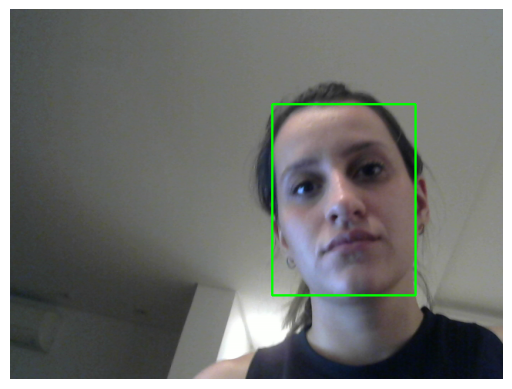

Resposta do servidor: {'name': 'jack'}
Rosto detectado!


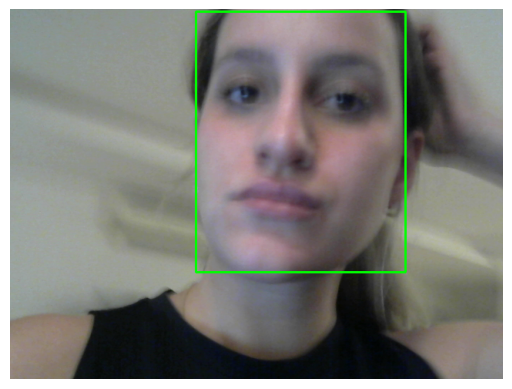

Resposta do servidor: {'name': 'jack'}
Rosto detectado!


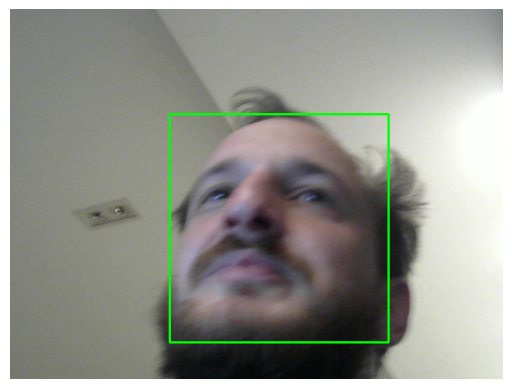

Resposta do servidor: {'message': 'No match found'}
Atalho Ctrl+Q pressionado, fechando a câmera...


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câmera...
Atalho Ctrl+Q pressionado, fechando a câ

In [1]:
import cv2
import face_recognition
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import keyboard  # Biblioteca para detectar atalhos de teclado

def detect_faces_from_webcam_and_send_to_server(server_url):
    # Carregar o modelo pré-treinado do OpenCV DNN (Caffe model para detecção de rosto)
    net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

    # Capturar a webcam
    video_capture = cv2.VideoCapture(0)

    # Verificar se a webcam foi acessada corretamente
    if not video_capture.isOpened():
        print("Não foi possível acessar a webcam.")
        return

    print("Aguardando até que um rosto seja detectado... (Pressione Ctrl+Q para sair)")

    # Variável para controlar o loop
    stop = False

    # Função para fechar a câmera ao pressionar Ctrl+Q
    def stop_capture():
        nonlocal stop
        stop = True
        print("Atalho Ctrl+Q pressionado, fechando a câmera...")

    # Definir o atalho Ctrl+Q para interromper a captura
    keyboard.add_hotkey('ctrl+q', stop_capture)

    try:
        while True:
            # Verificar se o atalho foi pressionado para parar o loop
            if stop:
                break

            # Capturar frame por frame da webcam
            ret, frame = video_capture.read()

            if not ret:
                print("Falha ao capturar imagem da webcam")
                break

            (h, w) = frame.shape[:2]

            # Pré-processar a imagem: redimensionar, normalizar
            blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
            net.setInput(blob)
            detections = net.forward()

            face_locations = []

            # Percorrer as detecções
            for i in range(0, detections.shape[2]):
                confidence = detections[0, 0, i, 2]

                # Filtrar detecções fracas (threshold de confiança pode ser ajustado)
                if confidence > 0.5:
                    # Obter as coordenadas da caixa delimitadora para o rosto detectado
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = box.astype("int")

                    # Adicionar à lista de localizações de rosto
                    face_locations.append((startY, endX, endY, startX))

                    # Desenhar a caixa delimitadora ao redor do rosto
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

            # Verificar se algum rosto foi detectado
            if len(face_locations) > 0:
                print("Rosto detectado!")

                # Mostrar o rosto detectado usando matplotlib
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                plt.imshow(rgb_frame)
                plt.axis('off')
                plt.show(block=False)
                plt.pause(3)  # Mantém a imagem visível por 3 segundos

                # Obter as codificações faciais para os rostos detectados
                face_encodings = face_recognition.face_encodings(frame, face_locations)

                # Preparar os dados para enviar ao servidor
                data_to_send = {
                    'encodings': [encoding.tolist() for encoding in face_encodings]  # Converter arrays numpy para listas
                }

                # Enviar as codificações faciais para o servidor
                try:
                    response = requests.post(server_url, json=data_to_send)
                    print("Resposta do servidor:", response.json())
                except Exception as e:
                    print(f"Erro ao enviar os dados para o servidor: {e}")

            # Esperar 10 segundos antes de capturar a próxima imagem
            time.sleep(10)

    finally:
        # Liberar a captura da webcam e fechar janelas abertas
        video_capture.release()
        cv2.destroyAllWindows()
        print("Webcam fechada com sucesso.")

# Testar a função
server_url = 'http://127.0.0.1:5000/recognize'
detect_faces_from_webcam_and_send_to_server(server_url)
